# Import dataset

In [1]:
# !pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="d0TYZxZJCWWTuBFwxYNI")
project = rf.workspace("bangkit-academy-rnfpg").project("acne-detection-g5vvz")
version = project.version(1)
dataset = version.download("folder")
                

loading Roboflow workspace...
loading Roboflow project...


In [2]:
print(dataset.location)

c:\Users\yosua\Downloads\klasifikasi-jerawat\Acne-detection-1


# Keluarkan kelas dari train-valid-test

In [3]:
import os
import shutil

# Deteksi lokasi folder dataset Roboflow secara dinamis
dataset_path = os.path.abspath("Acne-detection-1")
parent_dir = os.path.dirname(dataset_path)

# Buat folder baru untuk penggabungan di luar folder dataset
merged_path = os.path.join(parent_dir, "merged_acne_dataset")
os.makedirs(merged_path, exist_ok=True)

# Folder yang akan digabungkan (train, valid, test)
splits = ['train', 'valid', 'test']

for split in splits:
    split_path = os.path.join(dataset_path, split)
    if not os.path.exists(split_path):
        continue

    # Iterasi semua folder kelas di dalam split
    for class_name in os.listdir(split_path):
        class_dir = os.path.join(split_path, class_name)
        if not os.path.isdir(class_dir):
            continue

        # Buat folder kelas di folder penggabungan jika belum ada
        merged_class_dir = os.path.join(merged_path, class_name)
        os.makedirs(merged_class_dir, exist_ok=True)

        # Salin semua gambar dari folder split ke folder gabungan
        for img_file in os.listdir(class_dir):
            src_file = os.path.join(class_dir, img_file)
            dst_file = os.path.join(merged_class_dir, img_file)

            # Hindari overwrite dengan penamaan unik
            if os.path.exists(dst_file):
                base, ext = os.path.splitext(img_file)
                counter = 1
                while True:
                    new_name = f"{base}_{counter}{ext}"
                    dst_file = os.path.join(merged_class_dir, new_name)
                    if not os.path.exists(dst_file):
                        break
                    counter += 1

            shutil.copy2(src_file, dst_file)

print(f"Dataset telah digabungkan ke dalam: {merged_path}")


Dataset telah digabungkan ke dalam: c:\Users\yosua\Downloads\klasifikasi-jerawat\merged_acne_dataset


# hapus folder deteksi Acne karena akan melakukan klasifikasi

In [4]:
acne_folder = os.path.join(merged_path, "Acne")

if os.path.isdir(acne_folder):
    shutil.rmtree(acne_folder)
    print("Folder 'Acne' telah dihapus")
else:
    print("Folder 'Acne' tidak ditemukan. Tidak ada yang perlu dihapus.")


Folder 'Acne' telah dihapus


# Menggabungkan kelas yang mirip menjadi kelas utama

In [5]:
import os
import shutil

# Pastikan ini adalah path hasil penggabungan sebelumnya
merged_path = os.path.join(parent_dir, "merged_acne_dataset")

# Iterasi semua folder dalam folder gabungan
for folder_name in os.listdir(merged_path):
    folder_path = os.path.join(merged_path, folder_name)

    # Periksa apakah ini folder dan diawali dengan 'Acne '
    if os.path.isdir(folder_path) and folder_name.startswith("Acne "):
        # Ambil nama target setelah "Acne "
        target_name = folder_name.replace("Acne ", "", 1).strip()
        target_path = os.path.join(merged_path, target_name)

        # Buat folder target jika belum ada
        os.makedirs(target_path, exist_ok=True)

        # Pindahkan semua file dari folder asal ke folder target
        for file_name in os.listdir(folder_path):
            src_file = os.path.join(folder_path, file_name)
            dst_file = os.path.join(target_path, file_name)

            # Hindari overwrite
            if os.path.exists(dst_file):
                base, ext = os.path.splitext(file_name)
                counter = 1
                while True:
                    new_name = f"{base}_{counter}{ext}"
                    dst_file = os.path.join(target_path, new_name)
                    if not os.path.exists(dst_file):
                        break
                    counter += 1

            shutil.move(src_file, dst_file)

        # Setelah semua dipindahkan, hapus folder lama
        shutil.rmtree(folder_path)
        print(f"Folder '{folder_name}' telah digabung ke '{target_name}' dan dihapus.")

print("Penyatuan klasifikasi jerawat berhasil dilakukan,.")

Folder 'Acne Blackhead' telah digabung ke 'Blackhead' dan dihapus.
Folder 'Acne Blackhead Crystanlline' telah digabung ke 'Blackhead Crystanlline' dan dihapus.
Folder 'Acne Blackhead Crystanlline Papular' telah digabung ke 'Blackhead Crystanlline Papular' dan dihapus.
Folder 'Acne Blackhead Crystanlline Purulent' telah digabung ke 'Blackhead Crystanlline Purulent' dan dihapus.
Folder 'Acne Blackhead Cystic' telah digabung ke 'Blackhead Cystic' dan dihapus.
Folder 'Acne Blackhead Cystic Folliculitis' telah digabung ke 'Blackhead Cystic Folliculitis' dan dihapus.
Folder 'Acne Blackhead Cystic Folliculitis Keloid Papular' telah digabung ke 'Blackhead Cystic Folliculitis Keloid Papular' dan dihapus.
Folder 'Acne Blackhead Cystic Folliculitis Milium Papular Purulent' telah digabung ke 'Blackhead Cystic Folliculitis Milium Papular Purulent' dan dihapus.
Folder 'Acne Blackhead Cystic Folliculitis Papular Purulent' telah digabung ke 'Blackhead Cystic Folliculitis Papular Purulent' dan dihapus.

In [6]:
import os
import shutil
from collections import defaultdict

# Path dataset hasil merge
merged_path = os.path.join(parent_dir, "merged_acne_dataset")

# Mapping kata pertama ke folder-folder dengan awalan sama
prefix_map = defaultdict(list)

# Identifikasi semua folder
for folder_name in os.listdir(merged_path):
    folder_path = os.path.join(merged_path, folder_name)
    if os.path.isdir(folder_path):
        # Ambil kata pertama
        prefix = folder_name.split()[0]
        prefix_map[prefix].append(folder_name)

# Proses penggabungan folder berdasarkan prefix
for prefix, folders in prefix_map.items():
    if len(folders) <= 1:
        continue  # Tidak perlu digabung kalau hanya satu

    target_folder = os.path.join(merged_path, prefix)
    os.makedirs(target_folder, exist_ok=True)

    for folder_name in folders:
        current_folder = os.path.join(merged_path, folder_name)
        if current_folder == target_folder:
            continue  # Lewati jika sudah merupakan target

        # Pindahkan semua file
        for file_name in os.listdir(current_folder):
            src_file = os.path.join(current_folder, file_name)
            dst_file = os.path.join(target_folder, file_name)

            # Hindari overwrite
            if os.path.exists(dst_file):
                base, ext = os.path.splitext(file_name)
                counter = 1
                while True:
                    new_name = f"{base}_{counter}{ext}"
                    dst_file = os.path.join(target_folder, new_name)
                    if not os.path.exists(dst_file):
                        break
                    counter += 1

            shutil.move(src_file, dst_file)

        # Hapus folder lama setelah kosong
        shutil.rmtree(current_folder)
        print(f"Folder '{folder_name}' digabung ke '{prefix}' dan dihapus.")


Folder 'Blackhead Crystanlline' digabung ke 'Blackhead' dan dihapus.
Folder 'Blackhead Crystanlline Cystic' digabung ke 'Blackhead' dan dihapus.
Folder 'Blackhead Crystanlline Cystic Purulent' digabung ke 'Blackhead' dan dihapus.
Folder 'Blackhead Crystanlline Folliculitis Papular Purulent' digabung ke 'Blackhead' dan dihapus.
Folder 'Blackhead Crystanlline Papular' digabung ke 'Blackhead' dan dihapus.
Folder 'Blackhead Crystanlline Papular Purulent' digabung ke 'Blackhead' dan dihapus.
Folder 'Blackhead Crystanlline Purulent' digabung ke 'Blackhead' dan dihapus.
Folder 'Blackhead Cystic' digabung ke 'Blackhead' dan dihapus.
Folder 'Blackhead Cystic Flat_wart' digabung ke 'Blackhead' dan dihapus.
Folder 'Blackhead Cystic Flat_wart Keloid Papular Purulent Sebo-crystan-conglo' digabung ke 'Blackhead' dan dihapus.
Folder 'Blackhead Cystic Flat_wart Keloid Papular Purulent Sebo-crystan-conglo Whitehead' digabung ke 'Blackhead' dan dihapus.
Folder 'Blackhead Cystic Flat_wart Keloid Papular 

# Split dataset

In [7]:
import os
import shutil
import random

# Path dataset hasil penggabungan
merged_path = os.path.abspath("merged_acne_dataset")
split_base = os.path.join(os.path.dirname(merged_path), "jerawat-split")

# Rasio pembagian
ratios = {
    'train': 0.80,
    'valid': 0.10,
    'test': 0.10
}

# Buat folder target: train, valid, test
for split in ratios:
    for class_name in os.listdir(merged_path):
        class_dir = os.path.join(split_base, split, class_name)
        os.makedirs(class_dir, exist_ok=True)

# Proses pembagian per kelas
for class_name in os.listdir(merged_path):
    class_path = os.path.join(merged_path, class_name)
    if not os.path.isdir(class_path):
        continue

    # Daftar file dalam kelas
    files = os.listdir(class_path)
    random.shuffle(files)

    total = len(files)
    train_end = int(total * ratios['train'])
    valid_end = train_end + int(total * ratios['valid'])

    split_files = {
        'train': files[:train_end],
        'valid': files[train_end:valid_end],
        'test': files[valid_end:]
    }

    # Salin file ke folder baru
    for split, file_list in split_files.items():
        for file_name in file_list:
            src_file = os.path.join(class_path, file_name)
            dst_file = os.path.join(split_base, split, class_name, file_name)
            shutil.copy2(src_file, dst_file)

print(f"Dataset telah terpecah ke dalam folder baru: {split_base}")

Dataset telah terpecah ke dalam folder baru: c:\Users\yosua\Downloads\klasifikasi-jerawat\jerawat-split


In [8]:
import os

split_base = os.path.abspath("jerawat-split")

train_dir = os.path.join(split_base, "train")
valid_dir = os.path.join(split_base, "valid")
test_dir  = os.path.join(split_base, "test")

print(f"Train directory: {train_dir}")
print(f"Valid directory: {valid_dir}")
print(f"Test directory:  {test_dir}")

Train directory: c:\Users\yosua\Downloads\klasifikasi-jerawat\jerawat-split\train
Valid directory: c:\Users\yosua\Downloads\klasifikasi-jerawat\jerawat-split\valid
Test directory:  c:\Users\yosua\Downloads\klasifikasi-jerawat\jerawat-split\test


# Image Processing

In [14]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

img_width = 128
img_height = 128
image_size = (img_width, img_height)
batch_size = 32

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    zoom_range=0.2,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    shear_range=0.1
)

valid_datagen = ImageDataGenerator(rescale=1./255)
test_datagen  = ImageDataGenerator(rescale=1./255)

train_gen = train_datagen.flow_from_directory(train_dir, target_size=image_size, batch_size=batch_size, class_mode='categorical')
valid_gen = valid_datagen.flow_from_directory(valid_dir, target_size=image_size, batch_size=batch_size, class_mode='categorical')
test_gen  = test_datagen.flow_from_directory(test_dir,  target_size=image_size, batch_size=batch_size, class_mode='categorical', shuffle=False)

num_classes = len(train_gen.class_indices)
print("Kelas ditemukan:", train_gen.class_indices)
print("Jumlah kelas:", num_classes)

Found 40758 images belonging to 14 classes.
Found 13846 images belonging to 14 classes.
Found 13967 images belonging to 14 classes.
Kelas ditemukan: {'Blackhead': 0, 'Conglobata': 1, 'Crystanlline': 2, 'Cystic': 3, 'Flat_wart': 4, 'Folliculitis': 5, 'Keloid': 6, 'Milium': 7, 'Papular': 8, 'Purulent': 9, 'Scars': 10, 'Sebo-crystan-conglo': 11, 'Syringoma': 12, 'Whitehead': 13}
Jumlah kelas: 14


# Model

In [13]:
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.regularizers import l2

base_model = MobileNetV2(input_shape=(img_width, img_height, 3), include_top=False, weights='imagenet')
base_model.trainable = False

# for layer in base_model.layers[:100]:
#     layer.trainable = False

x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(512, activation='relu', kernel_regularizer=l2(0.001))(x)
x = Dropout(0.5)(x)
output = Dense(num_classes, activation='softmax', kernel_regularizer=l2(0.001))(x)

model = Model(inputs=base_model.input, outputs=output)
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
# model.summary()


9406464/9406464 [==============================] - 4s 0us/step


# Training

In [15]:
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import ReduceLROnPlateau

callbacks = [
    EarlyStopping(patience=10, restore_best_weights=True, verbose=1),
    ReduceLROnPlateau(patience=5, factor=0.3, verbose=1)
]

history = model.fit(
    train_gen,
    validation_data=valid_gen,
    epochs=50,
    callbacks=callbacks
)

Epoch 1/50
1274/1274 [==============================] - 730s 571ms/step - loss: 1.9998 - accuracy: 0.4138 - val_loss: 1.6885 - val_accuracy: 0.4424 - lr: 0.0010
Epoch 2/50
1274/1274 [==============================] - 524s 412ms/step - loss: 1.7348 - accuracy: 0.4357 - val_loss: 1.5933 - val_accuracy: 0.4645 - lr: 0.0010
Epoch 3/50
1274/1274 [==============================] - 485s 381ms/step - loss: 1.6903 - accuracy: 0.4446 - val_loss: 1.5588 - val_accuracy: 0.4722 - lr: 0.0010
Epoch 4/50
1274/1274 [==============================] - 481s 378ms/step - loss: 1.6688 - accuracy: 0.4459 - val_loss: 1.5956 - val_accuracy: 0.4567 - lr: 0.0010
Epoch 5/50
1274/1274 [==============================] - 484s 380ms/step - loss: 1.6662 - accuracy: 0.4484 - val_loss: 1.5811 - val_accuracy: 0.4684 - lr: 0.0010
Epoch 6/50
1274/1274 [==============================] - 481s 378ms/step - loss: 1.6529 - accuracy: 0.4555 - val_loss: 1.5169 - val_accuracy: 0.4858 - lr: 0.0010
Epoch 7/50
1274/1274 [============

# ROC AUC Score 

In [17]:
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import label_binarize

y_true = test_gen.classes
y_score = model.predict(test_gen, verbose=1)

y_true_binarized = label_binarize(y_true, classes=list(range(len(test_gen.class_indices))))

roc_auc = roc_auc_score(y_true_binarized, y_score, average='macro', multi_class='ovr')
print(f"ROC AUC Score (Macro Average): {roc_auc:.4f}")


437/437 [==============================] - 117s 265ms/step
ROC AUC Score (Macro Average): 0.9481


# Precesion-Recall-F1score

In [18]:
from sklearn.metrics import classification_report
import numpy as np

y_pred = model.predict(test_gen)
y_true = test_gen.classes
y_pred_classes = np.argmax(y_pred, axis=1)

print(classification_report(y_true, y_pred_classes, target_names=test_gen.class_indices.keys()))

437/437 [==============================] - 113s 257ms/step
                     precision    recall  f1-score   support

          Blackhead       0.53      0.96      0.68      5543
         Conglobata       0.70      0.11      0.19        62
       Crystanlline       0.61      0.47      0.53       334
             Cystic       0.69      0.34      0.45      1802
          Flat_wart       0.86      0.24      0.38       879
       Folliculitis       0.90      0.22      0.35       612
             Keloid       0.97      0.26      0.41       693
             Milium       0.92      0.37      0.53       655
            Papular       0.74      0.43      0.55      2827
           Purulent       0.82      0.37      0.51       314
              Scars       1.00      0.39      0.56        36
Sebo-crystan-conglo       1.00      0.23      0.38        47
          Syringoma       1.00      0.64      0.78        70
          Whitehead       0.80      0.74      0.77        93

           accuracy     

# test akurasi training

In [19]:
test_loss, test_acc = model.evaluate(test_gen)
print(f'\n Akurasi Testing: {test_acc * 100:.2f}%')

437/437 [==============================] - 111s 255ms/step - loss: 1.2294 - accuracy: 0.5971

 Akurasi Testing: 59.71%


# Plot evaluasi

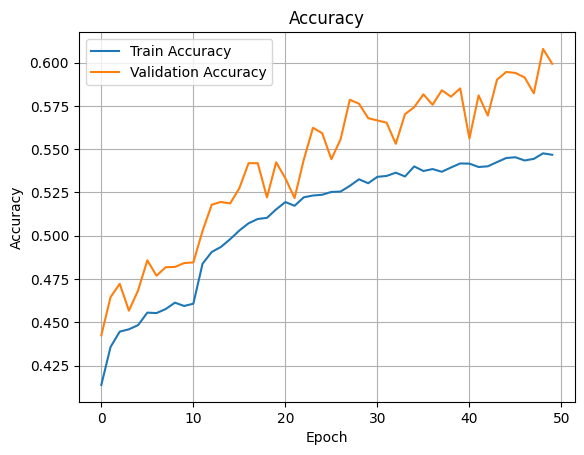

In [20]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()


# Simpan Model

In [21]:
model.save("model_23_may_2025.keras")
print("Model tersimpan sebagai model_klasifikasi_jerawat.keras")

Model tersimpan sebagai model_klasifikasi_jerawat.keras


# Inferensi

1/1 [==============================] - 1s 720ms/step


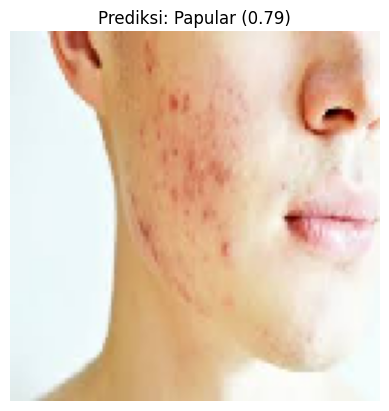

In [ ]:
from tensorflow.keras.preprocessing import image
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

# Muat model terlatih
model = tf.keras.models.load_model("model_23_may_2025.keras")

# Path gambar uji
img_path = "papula.jpg"
img = image.load_img(img_path, target_size=image_size)

# Pra-pemrosesan
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array /= 255.0  # Normalisasi sesuai training

# Prediksi
predictions = model.predict(img_array)
predicted_class = np.argmax(predictions[0])
class_labels = list(train_gen.class_indices.keys())
confidence = predictions[0][predicted_class]

# Tampilkan hasil
plt.imshow(img)
plt.title(f"Prediksi: {class_labels[predicted_class]} ({confidence:.2f})")
plt.axis("off")
plt.show()
